In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
data = pd.read_excel('ZERITOMMASOCDSSPREAD.xlsx', skiprows=2)

# Assuming the first row contains the country names and the second row has the codes
countries = data.iloc[0].astype(str) + ' (' + data.iloc[1].astype(str) + ')'
data.columns = countries  # Set the country names as column headers
data = data.drop(index=[0, 1])  # Remove the rows used as header

# Load years from the specific Excel cells (adjust if different in your file)
years = pd.read_excel('ZERITOMMASOCDSSPREAD.xlsx', usecols="A", skiprows=5, nrows=18, header=None)
data.index = years[0].values.flatten()  # Set years as index

# Convert all data to numeric, ignore errors to skip non-numeric data
data = data.apply(pd.to_numeric, errors='coerce')

# Drop any columns that are completely NA (if any)
data = data.dropna(axis=1, how='all')

# Function to find outliers
def find_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]

# Number of countries per plot
num_countries_per_plot = 35

# Total number of plots needed
num_plots = len(data.columns) // num_countries_per_plot + (1 if len(data.columns) % num_countries_per_plot != 0 else 0)

# Create individual plots for each group of countries and print outliers and statistics
for i in range(num_plots):
    start_index = i * num_countries_per_plot
    end_index = min(start_index + num_countries_per_plot, len(data.columns))  # Ensure we don't go out of bounds

    subset = data.iloc[:, start_index:end_index]
    
    # Plotting
    plt.figure(figsize=(20, 10))  # Large figure for clarity
    subset.boxplot(vert=False, patch_artist=True, showfliers=True, flierprops={'marker': 'o', 'color': 'red', 'markerfacecolor': 'green', 'markersize': 6})
    plt.title(f'CDS Premiums for Countries {start_index + 1} to {end_index}', fontsize=16)
    plt.xlabel('CDS Premium Values', fontsize=14)
    plt.ylabel('Countries', fontsize=14)
    plt.yticks(fontsize=12, rotation=0)  # Horizontal labels for better readability
    plt.xticks(fontsize=12)
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to fit everything properly
    plt.show()

    # Outliers detection, display, and statistical summary
    for country in subset.columns:
        outlier_values = find_outliers(subset[country])
        if not outlier_values.empty:
            print(f"Outliers for {country}:")
            for year, value in outlier_values.items():
                print(f"  Year: {year}, Value: {value}")
            print("\n")
        
        # Print additional statistics
        stats = subset[country].describe()
        skewness = subset[country].skew()
        kurtosis = subset[country].kurtosis()
        print(f"Statistics for {country}:")
        print(stats)
        print(f"Skewness: {skewness}")
        print(f"Kurtosis: {kurtosis}")
        print("\n")


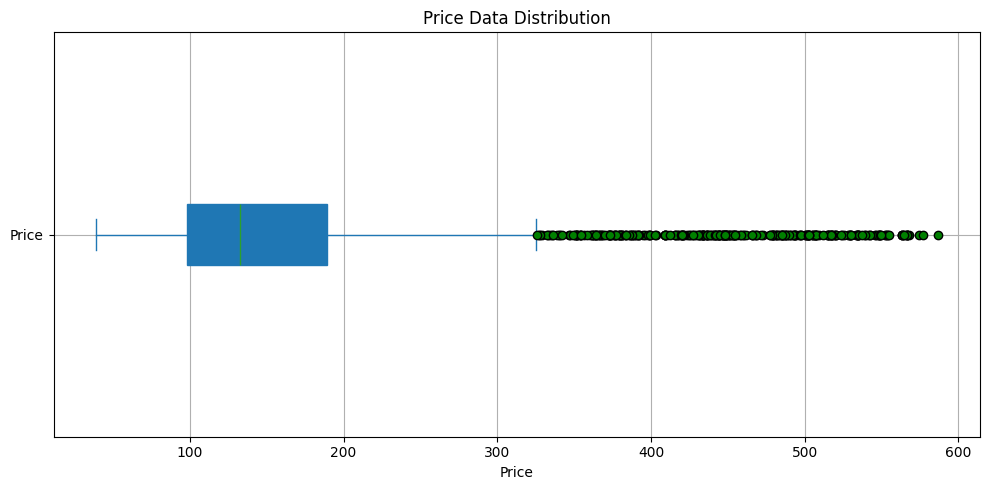

Outliers:
 3239    329.20
3240    334.07
3241    340.27
3242    351.93
3243    351.58
         ...  
3543    383.80
3544    363.98
3545    354.40
3546    328.10
3556    325.97
Name: Price, Length: 300, dtype: float64
Statistical Summary:
 count    4323.000000
mean      160.391740
std        98.558256
min        38.750000
25%        98.020000
50%       132.580000
75%       189.170000
max       586.700000
Name: Price, dtype: float64
Skewness:  1.957392962364292
Kurtosis:  4.116613707014041


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the data
data = pd.read_csv('ITGV5YUSAC=R Overview.csv')
data[['Date', 'Price']] = data['Date;Price'].str.split(';', expand=True)
data.drop('Date;Price', axis=1, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Function to find outliers using the IQR method
def find_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]

# Plotting the box plot for price data
plt.figure(figsize=(10, 5))
data['Price'].plot(kind='box', vert=False, patch_artist=True, showfliers=True,
                   flierprops={'marker': 'o', 'color': 'red', 'markerfacecolor': 'green', 'markersize': 6})
plt.title('Price Data Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Detecting outliers
outliers = find_outliers(data['Price'])

# Printing outliers and statistical summary
print("Outliers:\n", outliers)
print("Statistical Summary:\n", data['Price'].describe())
print("Skewness: ", data['Price'].skew())
print("Kurtosis: ", data['Price'].kurtosis())
